#### Audio Classification Data Preprocessing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='D:\\dataset\\UrbanSound8K\\audio\\fold1\\9031-3-4-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[0.0535574  0.07807359 0.06897732 ... 0.06880059 0.07718992 0.        ]


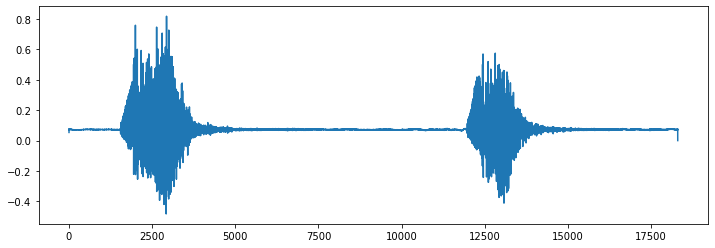

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([2377, 2377, 2371, ..., 2351, 2327, 2313], dtype=int16)

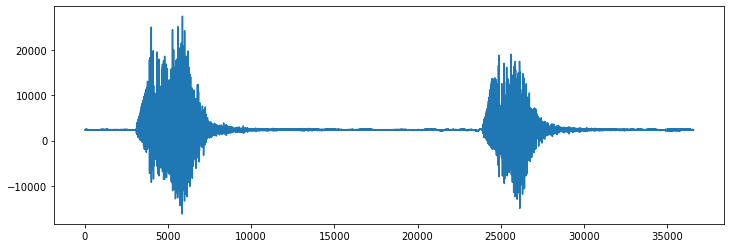

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 36)


In [8]:
mfccs

array([[-4.9263629e+02, -5.1666699e+02, -3.4434473e+02, ...,
        -4.5265356e+02, -4.4227603e+02, -3.9506955e+02],
       [ 2.1022778e+01,  3.2360680e+01, -1.4441717e-01, ...,
         4.0504066e+01,  1.3646534e+01,  4.0124183e+00],
       [ 3.1373375e+01,  2.4198242e+01, -7.5386192e+01, ...,
        -1.5294082e+01, -3.9495051e+00,  8.5138664e+00],
       ...,
       [ 5.3062348e+00,  4.0444374e+00,  8.4519835e+00, ...,
         2.2136710e+00,  4.2268376e+00,  4.9588656e+00],
       [ 3.4258902e+00,  3.5631077e+00, -1.7474413e-01, ...,
        -1.7491052e+00,  1.8455843e+00,  5.6898022e+00],
       [ 4.0504341e+00,  5.1131124e+00,  2.7819359e+00, ...,
        -6.4594660e+00, -3.1788251e+00,  4.3545055e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path="D:\\dataset\\UrbanSound8K\\audio"
metadata=pd.read_csv("D:\\dataset\\UrbanSound8K\\metadata\\UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1864it [01:33, 21.53it/s]

In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [19]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537492e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
X_train.shape

(6985, 40)

In [26]:
X_test.shape

(1747, 40)

In [27]:
y_train.shape

(6985, 10)

In [28]:
y_test.shape

(1747, 10)

### Model Creation

In [29]:
import tensorflow as tf
print(tf.__version__)

2.5.1


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels=y.shape[1]

In [32]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [34]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 10.1407 - accuracy: 0.1233 - val_loss: 2.2910 - val_accuracy: 0.1156

Epoch 00001: val_loss improved from inf to 2.29097, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 2.5054 - accuracy: 0.1187 - val_loss: 2.2783 - val_accuracy: 0.1139

Epoch 00002: val_loss improved from 2.29097 to 2.27829, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3400 - accuracy: 0.1244 - val_loss: 2.2616 - val_accuracy: 0.1225

Epoch 00003: val_loss improved from 2.27829 to 2.26164, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2804 - accuracy: 0.1359 - val_loss: 2.2340 - val_accuracy: 0.1317

Epoch 00004: val_loss improved from 2.26164 to 2.23403, saving model to saved_models\audio_cla

219/219 [==============================] - 1s 2ms/step - loss: 1.3644 - accuracy: 0.5241 - val_loss: 1.1646 - val_accuracy: 0.6434

Epoch 00034: val_loss did not improve from 1.15252
Epoch 35/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3383 - accuracy: 0.5357 - val_loss: 1.1323 - val_accuracy: 0.6388

Epoch 00035: val_loss improved from 1.15252 to 1.13230, saving model to saved_models\audio_classification.hdf5
Epoch 36/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3024 - accuracy: 0.5459 - val_loss: 1.1219 - val_accuracy: 0.6485

Epoch 00036: val_loss improved from 1.13230 to 1.12189, saving model to saved_models\audio_classification.hdf5
Epoch 37/100
219/219 [==============================] - 1s 2ms/step - loss: 1.2756 - accuracy: 0.5579 - val_loss: 1.1021 - val_accuracy: 0.6302

Epoch 00037: val_loss improved from 1.12189 to 1.10211, saving model to saved_models\audio_classification.hdf5
Epoch 38/100
219/219 [===========================

219/219 [==============================] - 1s 3ms/step - loss: 1.0498 - accuracy: 0.6419 - val_loss: 0.8827 - val_accuracy: 0.7121

Epoch 00070: val_loss did not improve from 0.85856
Epoch 71/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0235 - accuracy: 0.6494 - val_loss: 0.8572 - val_accuracy: 0.7252

Epoch 00071: val_loss improved from 0.85856 to 0.85719, saving model to saved_models\audio_classification.hdf5
Epoch 72/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0416 - accuracy: 0.6545 - val_loss: 0.8630 - val_accuracy: 0.7252

Epoch 00072: val_loss did not improve from 0.85719
Epoch 73/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0414 - accuracy: 0.6490 - val_loss: 0.8569 - val_accuracy: 0.7230

Epoch 00073: val_loss improved from 0.85719 to 0.85693, saving model to saved_models\audio_classification.hdf5
Epoch 74/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0400 - accuracy: 0.6544 - val_l

In [35]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7550085783004761


In [37]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.166929  ,  -18.850813  ,   -0.7415805 ,  -15.99989   ,
        -21.354332  ,    7.650684  ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.70152664,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529794,  -23.953394  ,
        -15.200551  ,    9.210791  ,   10.4198    ,   -0.5791612 ,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [40]:
model.predict_classes(X_test)

array([5, 3, 4, ..., 1, 9, 0], dtype=int64)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [42]:
filename="D:\\dataset\\train_curated\\00c17dd2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.2847768e+02  7.5238388e+01  4.7343155e+01  5.1996834e+01
  2.7693552e+01  4.3854050e+01  6.5433774e+00  1.9044016e+01
 -1.3927026e+00  1.3753165e+01 -4.9718547e+00  1.0101815e+01
 -3.3822734e+00  6.0568795e+00 -2.7916880e+00  4.3424425e+00
 -9.9330072e+00 -1.2488376e+00 -5.7163463e+00  4.5201951e-01
 -3.0023450e-01  1.7723334e+00 -4.5670905e+00  1.0600184e+00
 -5.4100733e+00  2.2344241e-01 -3.0643210e+00 -3.3105681e+00
 -2.2783313e+00  7.7272040e-01 -4.9528465e+00 -1.6929680e+00
 -9.8045045e-01 -2.2544191e+00 -8.7030387e-01 -5.9006512e-01
 -5.8801937e+00 -1.0711617e+00 -2.4973516e+00 -3.0930781e+00]
[[-2.2847768e+02  7.5238388e+01  4.7343155e+01  5.1996834e+01
   2.7693552e+01  4.3854050e+01  6.5433774e+00  1.9044016e+01
  -1.3927026e+00  1.3753165e+01 -4.9718547e+00  1.0101815e+01
  -3.3822734e+00  6.0568795e+00 -2.7916880e+00  4.3424425e+00
  -9.9330072e+00 -1.2488376e+00 -5.7163463e+00  4.5201951e-01
  -3.0023450e-01  1.7723334e+00 -4.5670905e+00  1.0600184e+00
  -5.4100733e+00 

array(['engine_idling'], dtype='<U16')